In [1]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.tseries.offsets import DateOffset
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('TotalAssetsPercentage.xls')
print(data)

#Change in total assets in banks, quarterly, seasonality

         DATE  CHANGE
0  2008-01-01     9.5
1  2008-04-01     0.0
2  2008-07-01    -0.5
3  2008-10-01    21.6
4  2009-01-01    -4.3
5  2009-04-01    -5.8
6  2009-07-01   -12.3
7  2009-10-01    -3.1
8  2010-01-01    -1.6
9  2010-04-01    -9.2
10 2010-07-01     0.5
11 2010-10-01     1.4
12 2011-01-01     3.1
13 2011-04-01     9.5
14 2011-07-01     4.8
15 2011-10-01     2.9
16 2012-01-01     2.1
17 2012-04-01     1.4
18 2012-07-01     3.6
19 2012-10-01     3.6
20 2013-01-01     7.4
21 2013-04-01     4.8
22 2013-07-01     5.4
23 2013-10-01     8.7
24 2014-01-01     7.3
25 2014-04-01     8.1
26 2014-07-01     8.2
27 2014-10-01     4.8
28 2015-01-01     7.0
29 2015-04-01     2.1
30 2015-07-01     1.2
31 2015-10-01     4.5
32 2016-01-01     2.6
33 2016-04-01     5.1
34 2016-07-01     3.7
35 2016-10-01    -0.7
36 2017-01-01     2.6
37 2017-04-01     2.5
38 2017-07-01     5.3
39 2017-10-01     4.0
40 2018-01-01    -0.5
41 2018-04-01    -0.3
42 2018-07-01     1.3
43 2018-10-01     2.9
44 2019-01

In [6]:
df= data.set_index('DATE')
#print(df)
df.index

DatetimeIndex(['2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

<AxesSubplot:xlabel='DATE'>

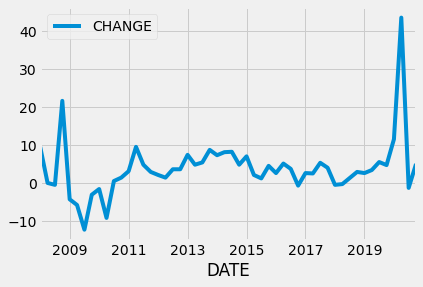

In [7]:
df.plot()
#Seasonality

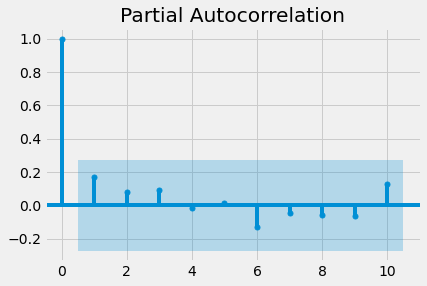

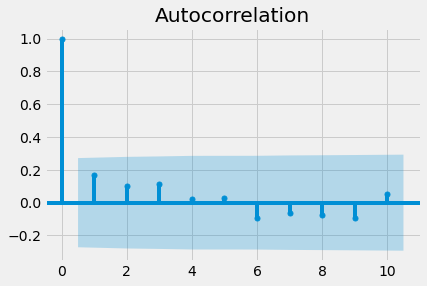

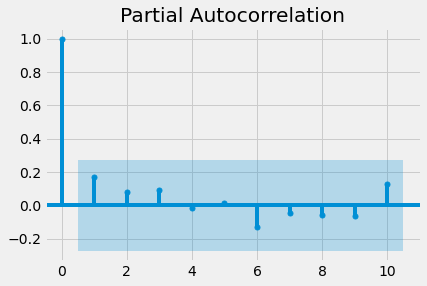

In [8]:
plot_acf(df,lags=10)

plot_pacf(df,lags=10)



<AxesSubplot:xlabel='DATE'>

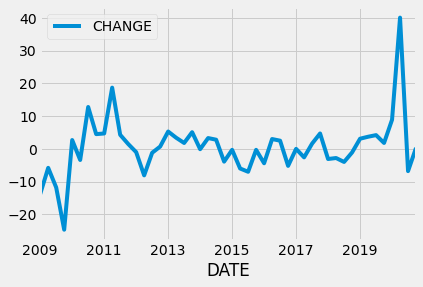

In [9]:
dif_df=df.diff(4).dropna()
dif_df.plot()

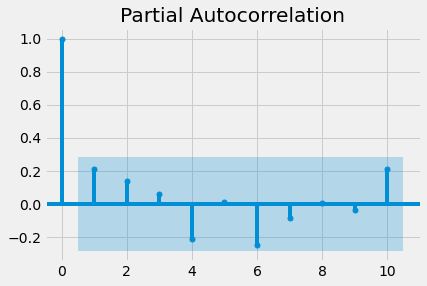

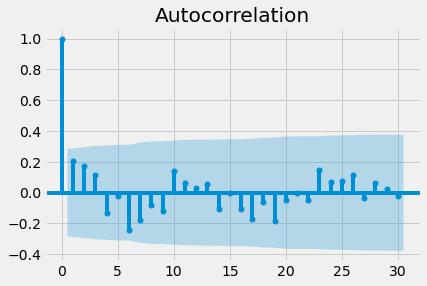

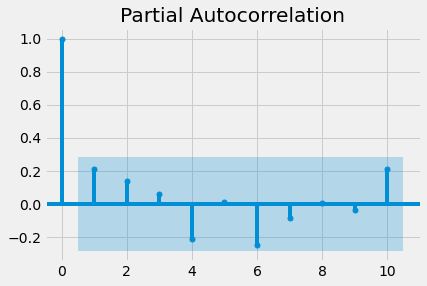

In [10]:
plot_acf(dif_df,lags=30)
plot_pacf(dif_df,lags=10)


In [11]:
train,test=df.iloc[:30],df.iloc[30:]
print(train)
print(test)

            CHANGE
DATE              
2008-01-01     9.5
2008-04-01     0.0
2008-07-01    -0.5
2008-10-01    21.6
2009-01-01    -4.3
2009-04-01    -5.8
2009-07-01   -12.3
2009-10-01    -3.1
2010-01-01    -1.6
2010-04-01    -9.2
2010-07-01     0.5
2010-10-01     1.4
2011-01-01     3.1
2011-04-01     9.5
2011-07-01     4.8
2011-10-01     2.9
2012-01-01     2.1
2012-04-01     1.4
2012-07-01     3.6
2012-10-01     3.6
2013-01-01     7.4
2013-04-01     4.8
2013-07-01     5.4
2013-10-01     8.7
2014-01-01     7.3
2014-04-01     8.1
2014-07-01     8.2
2014-10-01     4.8
2015-01-01     7.0
2015-04-01     2.1
            CHANGE
DATE              
2015-07-01     1.2
2015-10-01     4.5
2016-01-01     2.6
2016-04-01     5.1
2016-07-01     3.7
2016-10-01    -0.7
2017-01-01     2.6
2017-04-01     2.5
2017-07-01     5.3
2017-10-01     4.0
2018-01-01    -0.5
2018-04-01    -0.3
2018-07-01     1.3
2018-10-01     2.9
2019-01-01     2.6
2019-04-01     3.4
2019-07-01     5.5
2019-10-01     4.7
2020-01-01  

In [12]:
ar2 = 1
ma2 = (1,0,0,1)

model=sm.tsa.statespace.SARIMAX(train,trend='n',order=(ar2,1,ma2),enforce_stationarity=True,enforce_invertibility=True)

In [13]:
results=model.fit(disp=False)
print(results.summary())

                                 SARIMAX Results                                 
Dep. Variable:                    CHANGE   No. Observations:                   30
Model:             SARIMAX(1, 1, [1, 4])   Log Likelihood                 -94.747
Date:                   Sat, 13 Feb 2021   AIC                            197.495
Time:                           15:30:08   BIC                            202.964
Sample:                       01-01-2008   HQIC                           199.208
                            - 04-01-2015                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0769      0.233      0.330      0.741      -0.379       0.533
ma.L1         -0.7877      0.435     -1.809      0.070      -1.641       0.066
ma.L4         -0.1255      0

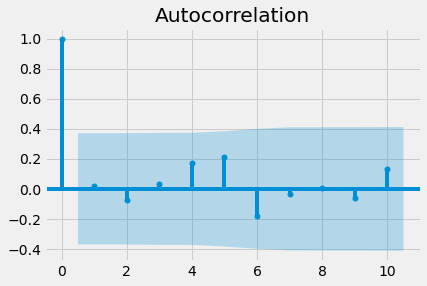

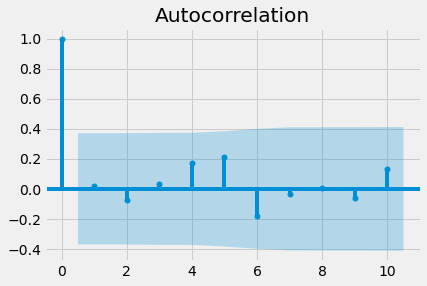

In [14]:
residuals=results.resid
residuals=residuals.iloc[1:-1]
plot_acf(residuals,lags=10)

In [15]:
#Pseudo

pred=results.get_prediction(start=30,end=35, dynamic=True)
pred_pseudo=pred.predicted_mean
mape=100*(abs(test-pred_pseudo)/test).mean()

print(test)
print(pred_pseudo)

            CHANGE
DATE              
2015-07-01     1.2
2015-10-01     4.5
2016-01-01     2.6
2016-04-01     5.1
2016-07-01     3.7
2016-10-01    -0.7
2017-01-01     2.6
2017-04-01     2.5
2017-07-01     5.3
2017-10-01     4.0
2018-01-01    -0.5
2018-04-01    -0.3
2018-07-01     1.3
2018-10-01     2.9
2019-01-01     2.6
2019-04-01     3.4
2019-07-01     5.5
2019-10-01     4.7
2020-01-01    11.5
2020-04-01    43.5
2020-07-01    -1.3
2020-10-01     5.0
2015-07-01    3.601362
2015-10-01    3.792573
2016-01-01    3.514375
2016-04-01    3.847950
2016-07-01    3.873600
2016-10-01    3.875572
Freq: QS-OCT, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='DATE'>

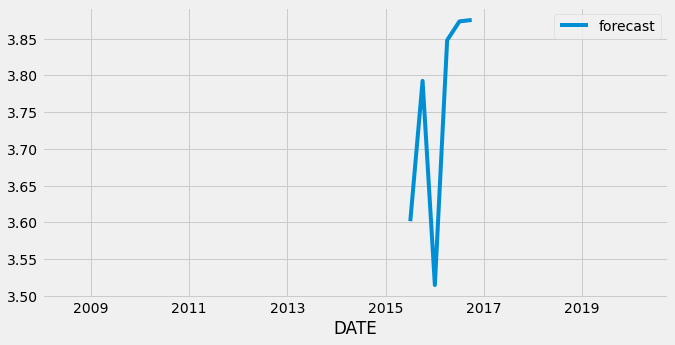

In [27]:
df["forecast"] = results.predict(start=30,end=35, dynamic=True)
df[["forecast" ]].plot(figsize=(10,5))

In [17]:
#mutliplicative seasonality
# arma(1,0) with seasonal AR

model2=sm.tsa.statespace.SARIMAX(train,trend='n',order=(1,1,0),seasonal_order=(1,1,0,4))

results2=model2.fit(disp=False)
print(results2.summary())



                                     SARIMAX Results                                     
Dep. Variable:                            CHANGE   No. Observations:                   30
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 -86.262
Date:                           Sat, 13 Feb 2021   AIC                            178.525
Time:                                   15:30:12   BIC                            182.182
Sample:                               01-01-2008   HQIC                           179.539
                                    - 04-01-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4264      0.162     -2.635      0.008      -0.743      -0.109
ar.S.L4       -0.3890      0.232     -1.675

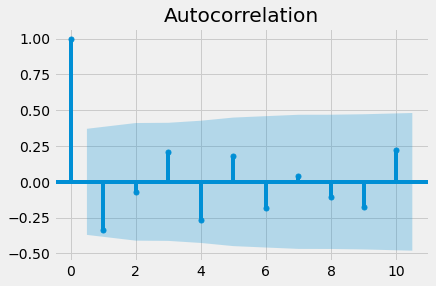

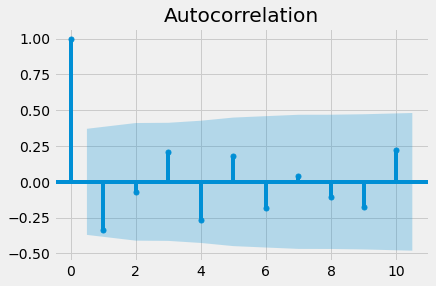

In [18]:
residuals2=results2.resid
residuals2=residuals2.iloc[1:-1]
plot_acf(residuals2,lags=10)


In [29]:
pred=results2.get_prediction(start=30,end=35, dynamic=True)
pred_pseudo=pred.predicted_mean
mape2=100*(abs(test-pred_pseudo)/test).mean()

print(test)
print(pred_pseudo)
mape2

            CHANGE
DATE              
2015-07-01     1.2
2015-10-01     4.5
2016-01-01     2.6
2016-04-01     5.1
2016-07-01     3.7
2016-10-01    -0.7
2017-01-01     2.6
2017-04-01     2.5
2017-07-01     5.3
2017-10-01     4.0
2018-01-01    -0.5
2018-04-01    -0.3
2018-07-01     1.3
2018-10-01     2.9
2019-01-01     2.6
2019-04-01     3.4
2019-07-01     5.5
2019-10-01     4.7
2020-01-01    11.5
2020-04-01    43.5
2020-07-01    -1.3
2020-10-01     5.0
2015-07-01    4.260911
2015-10-01    2.671101
2016-01-01    3.810170
2016-04-01    0.982528
2016-07-01    2.403524
2016-10-01    0.083342
Freq: QS-OCT, Name: predicted_mean, dtype: float64


2015-07-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
CHANGE                NaN
dtype: float64

<AxesSubplot:xlabel='DATE'>

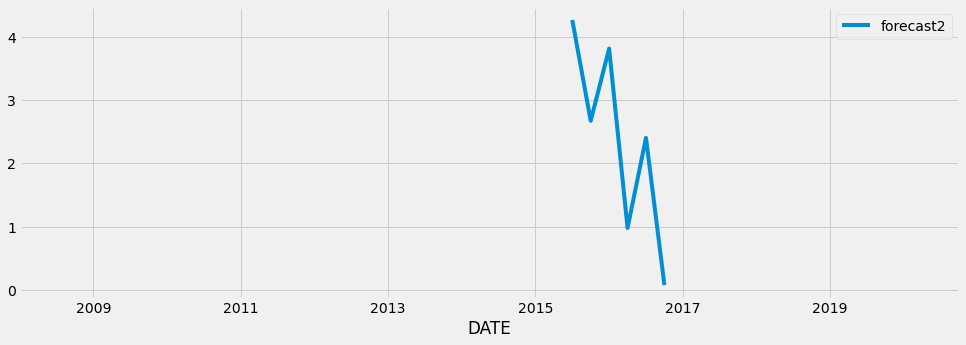

In [30]:
#Sample prediction
#Getting 16 quarters for forecasts
df["forecast2"] = results2.predict(start=30,end=35, dynamic=True)
df[["forecast2" ]].plot(figsize=(15,5))

<AxesSubplot:>

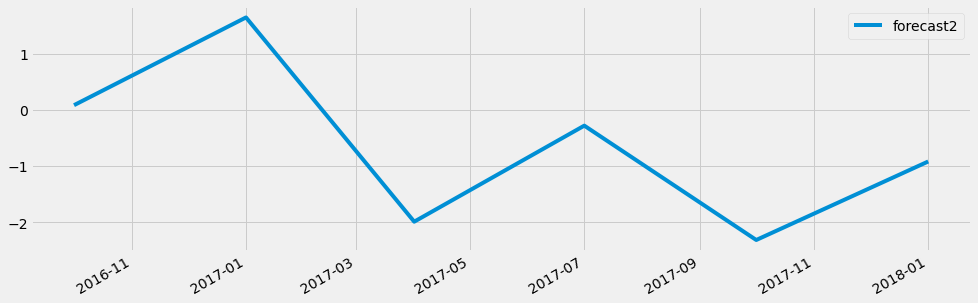

In [33]:
#Out of sample prediction
# Getting 8 quarters for forecasts

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,8)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df= pd.concat([df,future_datest_df])

future_df["forecast2"] = results2.predict(start=35,end=40, dynamic=True)
future_df[["forecast2" ]].plot(figsize=(15,5))

<AxesSubplot:xlabel='DATE'>

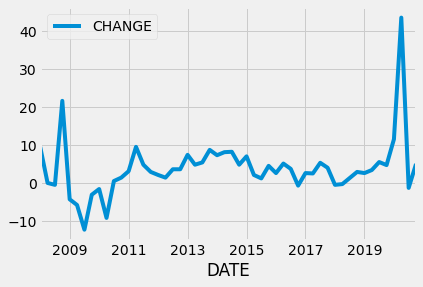

In [34]:
#Monthly Seaseonal
#Total Vehicle Sales


datam = pd.read_excel('TOTALSA.xls', sheet_name=0)
df2 = data.set_index('DATE')
#print(df)
df2.index
df2.plot()



<AxesSubplot:xlabel='DATE'>

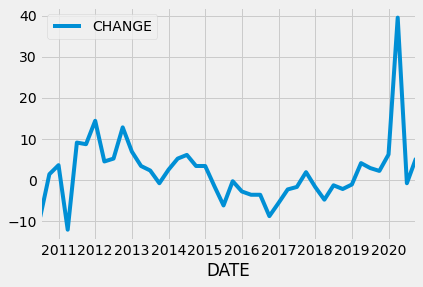

In [35]:
dif_df2=df2.diff(10).dropna()
dif_df2.plot()

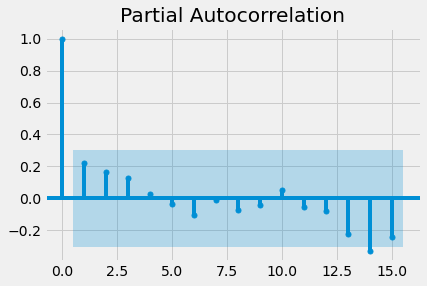

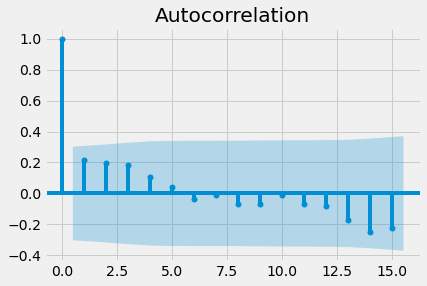

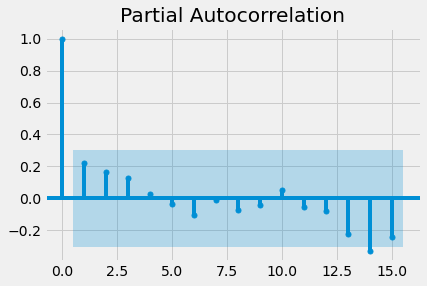

In [36]:
plot_acf(dif_df2,lags=15)
plot_pacf(dif_df2,lags=15)

In [37]:
##Create test and train group.
train2,test2=df2.iloc[:90],df2.iloc[90:]

ar = 1 
ma = (1,0,0,1)

model2=sm.tsa.statespace.SARIMAX(train2,trend='n',order=(ar,1,ma),enforce_stationarity=True, enforce_invertibility=True)

In [38]:
results2=model2.fit(disp=False)
print(results2.summary()) 
#AIC and BIC too high

                                 SARIMAX Results                                 
Dep. Variable:                    CHANGE   No. Observations:                   52
Model:             SARIMAX(1, 1, [1, 4])   Log Likelihood                -176.420
Date:                   Sat, 13 Feb 2021   AIC                            360.840
Time:                           15:36:18   BIC                            368.567
Sample:                       01-01-2008   HQIC                           363.793
                            - 10-01-2020                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0348      0.239      0.145      0.885      -0.435       0.504
ma.L1         -0.8506      0.219     -3.889      0.000      -1.279      -0.422
ma.L4         -0.0962      0

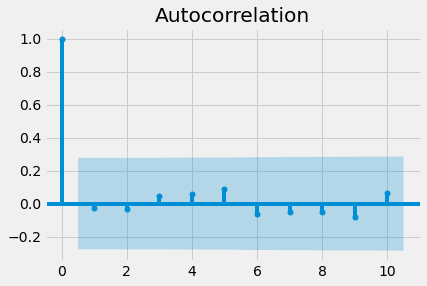

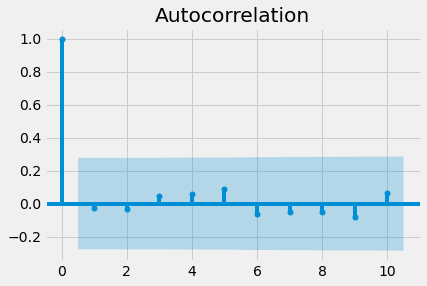

In [39]:
residuals2=results2.resid
residuals2=residuals2.iloc[1:-1]
plot_acf(residuals2,lags=10)

In [44]:
#Pseudo prediction
pred2=results2.get_prediction(start=30,end=40, dynamic=True)
pred_pseudo2=pred2.predicted_mean
mape2=100*(abs(test2-pred_pseudo2)/test2).mean()

print(mape2)

2015-07-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
CHANGE                NaN
dtype: float64


<AxesSubplot:xlabel='DATE'>

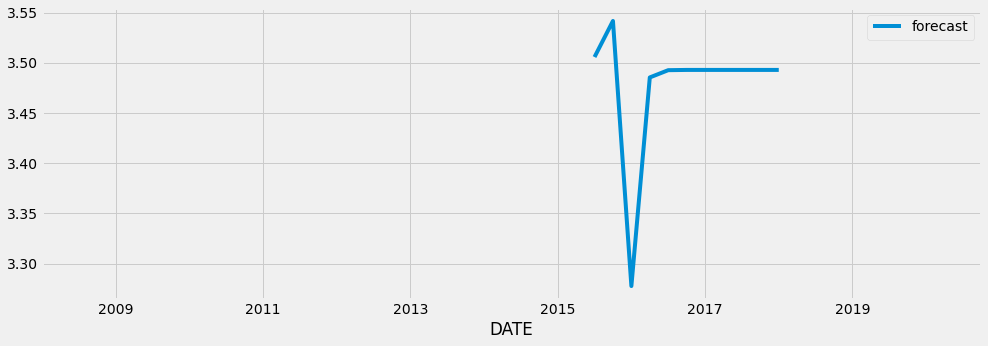

In [46]:
df2["forecast"] = results2.predict(start=30,end=40, dynamic=True)
df2[["forecast" ]].plot(figsize=(15,5))

In [47]:
#mutliplicative seasonality
# arma(1,0) with seasonal AR

model3=sm.tsa.statespace.SARIMAX(train2,trend='n',order=(1,1,0),seasonal_order=(1,1,0,10))

results3=model3.fit(disp=False)
print(results3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             CHANGE   No. Observations:                   52
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 10)   Log Likelihood                -146.937
Date:                            Sat, 13 Feb 2021   AIC                            299.873
Time:                                    15:37:30   BIC                            305.014
Sample:                                01-01-2008   HQIC                           301.745
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4808      0.081     -5.946      0.000      -0.639      -0.322
ar.S.L10       0.2174      0.625   

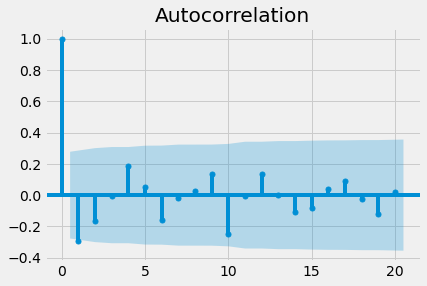

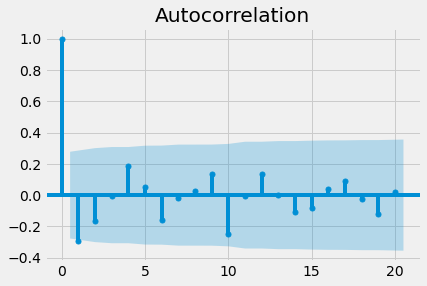

In [48]:
residuals3=results3.resid
residuals3=residuals3.iloc[1:-1]
plot_acf(residuals3,lags=20)

In [49]:
#Psuedo


pred3=results3.get_prediction(start=50,end=70, dynamic=True)
pred_pseudo3=pred3.predicted_mean
mape3=100*(abs(test2-pred_pseudo3)/test2).mean()

print(mape3)

2020-07-01 00:00:00   NaN
2020-10-01 00:00:00   NaN
2021-01-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
2022-04-01 00:00:00   NaN
2022-07-01 00:00:00   NaN
2022-10-01 00:00:00   NaN
2023-01-01 00:00:00   NaN
2023-04-01 00:00:00   NaN
2023-07-01 00:00:00   NaN
2023-10-01 00:00:00   NaN
2024-01-01 00:00:00   NaN
2024-04-01 00:00:00   NaN
2024-07-01 00:00:00   NaN
2024-10-01 00:00:00   NaN
2025-01-01 00:00:00   NaN
2025-04-01 00:00:00   NaN
2025-07-01 00:00:00   NaN
CHANGE                NaN
dtype: float64


<AxesSubplot:xlabel='DATE'>

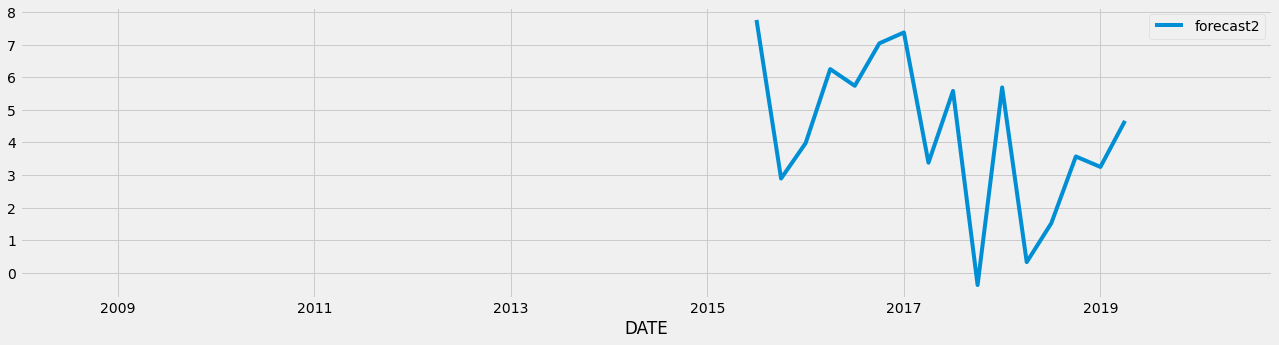

In [53]:
###Sample prediction
##Getting 20 months for forecasts
df2["forecast2"] = results3.predict(start=30,end=45, dynamic=True)
df2[["forecast2" ]].plot(figsize=(20,5))

<AxesSubplot:xlabel='DATE'>

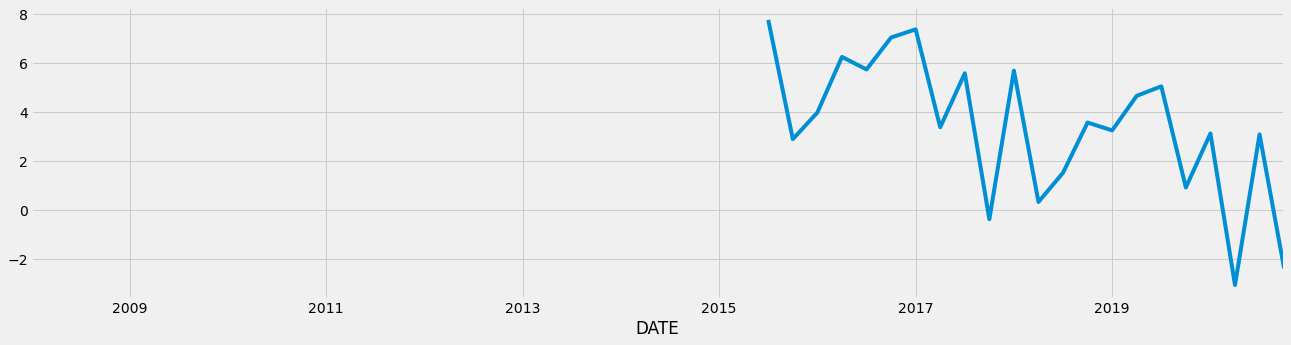

In [55]:
df2["forecast2"] = results3.predict(start=30,end=123, dynamic=True)
df2["forecast2" ].plot(figsize=(20,5))
